In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Visualización del dataset y obtención de información de sus variables
df = pd.read_csv('bank+marketing/bank/bank-full.csv', sep=';')
display(df.head())
display(df.info())
display(df.describe())
display(df.isnull().sum())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Visualisation of the study variables


Text(0, 0.5, 'Number of users')

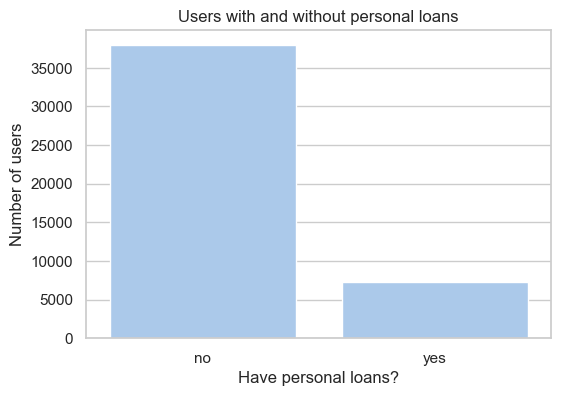

In [ ]:
# Setting the chart style for loan values
sns.set_theme(style='whitegrid', palette= 'pastel')

# Count values of loan
loan_counts = df['loan'].value_counts()

# Create the graph
plt.figure(figsize=(6,4))
sns.barplot(x=loan_counts.index, y= loan_counts.values) 

# Titles and labels

plt.title('Users with and without personal loans')
plt.xlabel('Have personal loans?')
plt.ylabel('Number of users')





In [6]:
# types of job
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

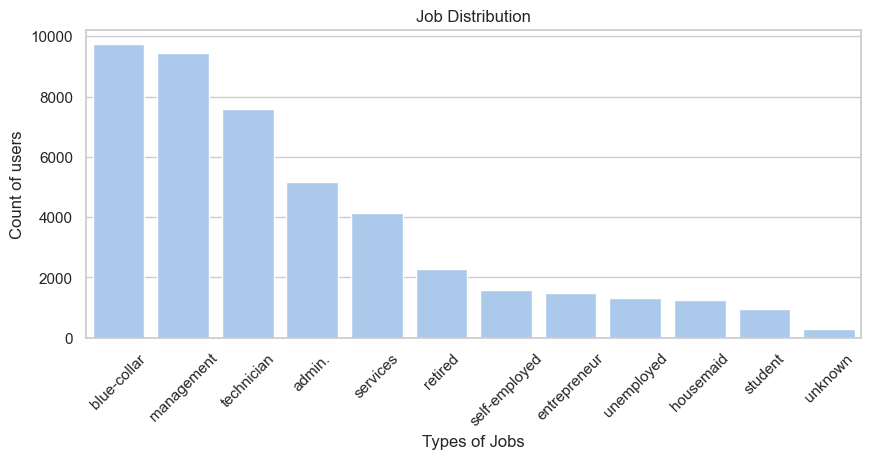

In [40]:
# Bar chart for job, marital and education
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x= 'job', order= df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xticks(rotation= 45)
plt.xlabel('Types of Jobs')
plt.ylabel('Count of users')
plt.show


In [ ]:
# ¿DE MEDIA PUEDE TENER UN SOLTERO O DIVORCIADO MÁS PROBABILIDAD DE ACEPTAR EL PRODUCTO FINANCIERO QUE UN CASADO? 
# ¿y UN SOLTERO QUE UN CASADO? ¿SE PREOCUPA MÁS UN DIVORCIADO POR UN PLAN DE AHORRO QUE UN CASADO? (OJO QUE DIVORCIADO INCLUYE TAMBIEN VIUDO)

In [21]:
df_empleo = df.groupby('job')['education'].value_counts()
df_empleo

job            education
admin.         secondary    4219
               tertiary      572
               primary       209
               unknown       171
blue-collar    secondary    5371
               primary      3758
               unknown       454
               tertiary      149
entrepreneur   tertiary      686
               secondary     542
               primary       183
               unknown        76
housemaid      primary       627
               secondary     395
               tertiary      173
               unknown        45
management     tertiary     7801
               secondary    1121
               primary       294
               unknown       242
retired        secondary     984
               primary       795
               tertiary      366
               unknown       119
self-employed  tertiary      833
               secondary     577
               primary       130
               unknown        39
services       secondary    3457
               pri

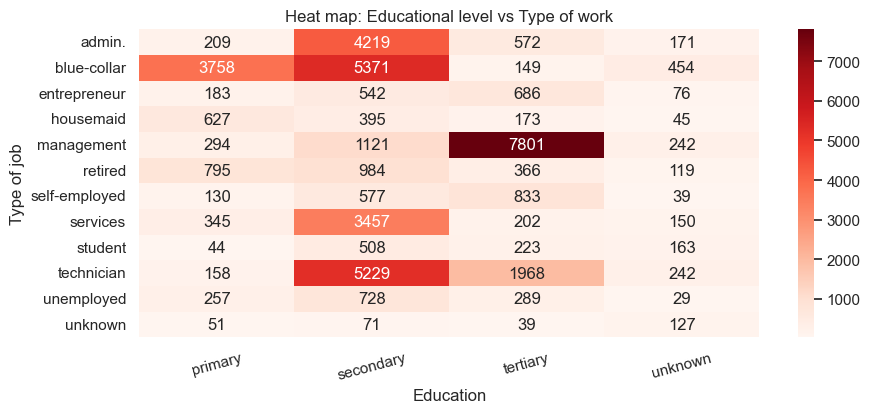

In [35]:
# Relation between education and type of job
df_job_heat = df.groupby(['job', 'education']).size().unstack() # --> Unstack Transform the values of the job and education columns into a table. # size is similar than count, but includes null values.
plt.figure(figsize=(10, 4))
sns.heatmap(df_job_heat, annot=True, fmt='g', cmap='Reds') # --> g= general format --> how show the values
plt.title('Heat map: Educational level vs Type of work')
plt.ylabel('Type of job')
plt.xlabel('Education')
plt.xticks(rotation=15)
plt.show()

In [ ]:
# What are the most common jobs of unknown education?
df_empleo_reset = df_empleo.reset_index(name='count') # --> converts the index into columns and the Series into a DataFrame.
df_empleo_reset[df_empleo_reset['education']== 'unknown'].sort_values(by='count',ascending= False).reset_index(drop=True)

# TENER EN CUENTA QUE HAY ESTUDIOS DESCONOCIDOS CON TRABAJOS DESCONOCIDOS --> VER SI TIENEN UN IMPACTO EN LA MUESTRA Y SI NO ELIMINARLOS

,job,education,count
0,blue-collar,unknown,454
1,management,unknown,242
2,technician,unknown,242
3,admin.,unknown,171
4,student,unknown,163
5,services,unknown,150
6,unknown,unknown,127
7,retired,unknown,119
8,entrepreneur,unknown,76
9,housemaid,unknown,45


<function matplotlib.pyplot.show(close=None, block=None)>

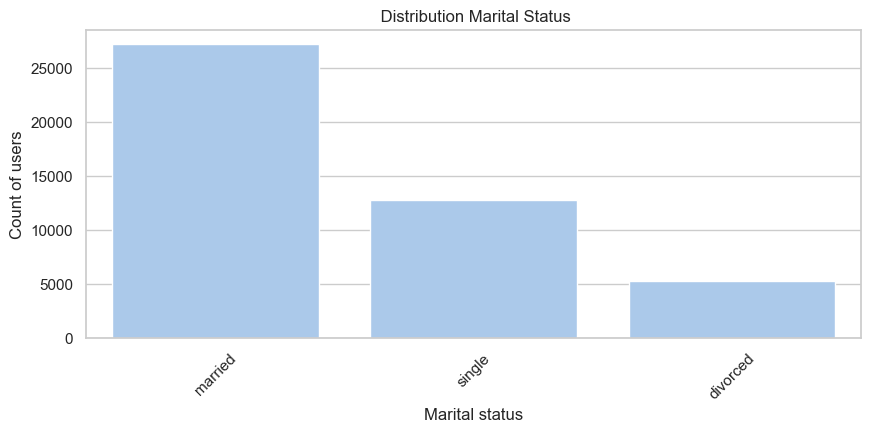

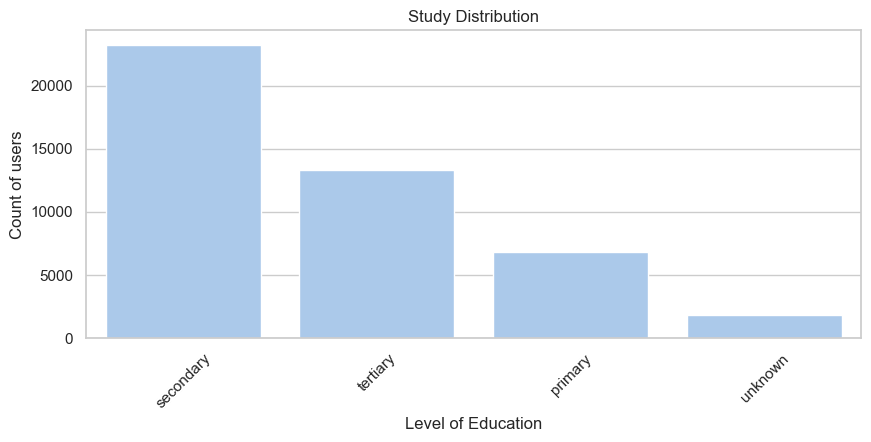

In [41]:
# Bar chart of marital
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x= 'marital', order= df['marital'].value_counts().index)
plt.title(' Distribution Marital Status')
plt.xticks(rotation= 45)
plt.xlabel('Marital status')
plt.ylabel('Count of users')
plt.show

# bar chart of education
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x= 'education', order= df['education'].value_counts().index)
plt.title('Study Distribution')
plt.xticks(rotation= 45)
plt.xlabel('Level of Education')
plt.ylabel('Count of users')
plt.show

In [ ]:
# group marital status as married or unmarried--> no, porque puede darse que los viudos estén jubilados, habría rarezas en la visualización o no sería una visualización correcta